In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import gzip
import urllib.request

In [2]:
data_url = "http://www.uvm.edu/pdodds/teaching/courses/2020-08UVM-300/docs/vocab_cs_mod.txt.gz"
with gzip.open(urllib.request.urlopen(data_url), "rb") as f:
    word_pairs = [[int(d) for d in l.decode("utf-8").split()] for l in f] # k, N_k (N_k words each appear k times in this corpus)

In [3]:
k, n_k = zip(*word_pairs)

In [4]:
print(word_pairs[0], k[0], n_k[0])
print(word_pairs[-1], k[-1], n_k[-1])

df = pd.DataFrame({"k":k, "n_k":n_k})
df["log10k"] = df["k"].apply(lambda x: np.log10(x))
df["log10n_k"] = df["n_k"].apply(lambda x: np.log10(x))

print(df.head())
print(df.tail())

[30578667846, 1] 30578667846 1
[200, 48030] 200 48030
             k  n_k     log10k  log10n_k
0  30578667846    1  10.485419       0.0
1  22077031422    1  10.343941       0.0
2  21594821357    1  10.334350       0.0
3  19401194714    1  10.287828       0.0
4  16337125274    1  10.213176       0.0
          k    n_k    log10k  log10n_k
238586  204  46023  2.309630  4.662975
238587  203  48262  2.307496  4.683605
238588  202  46787  2.305351  4.670125
238589  201  48179  2.303196  4.682858
238590  200  48030  2.301030  4.681513


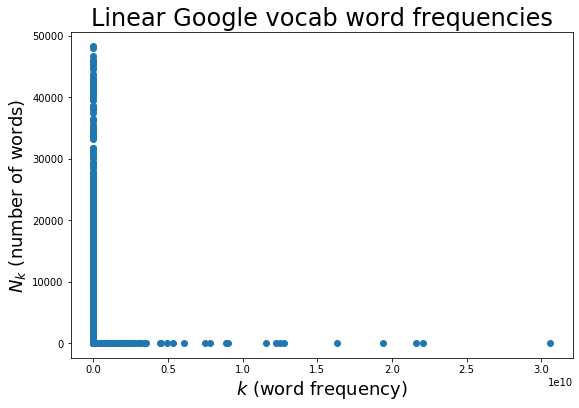

In [5]:
fig, ax = plt.subplots(1, figsize=(9,6))

ax.scatter(df["k"], df["n_k"], c="C0")
ax.set_xlabel(r"$k$ (word frequency)", fontsize=18)
ax.set_ylabel(r"$N_k$ (number of words)", fontsize=18)
ax.set_title("Linear Google vocab word frequencies", fontsize=24)
plt.savefig("part6_linear.png", bbox_inches='tight', pad_inches=0)
plt.show()

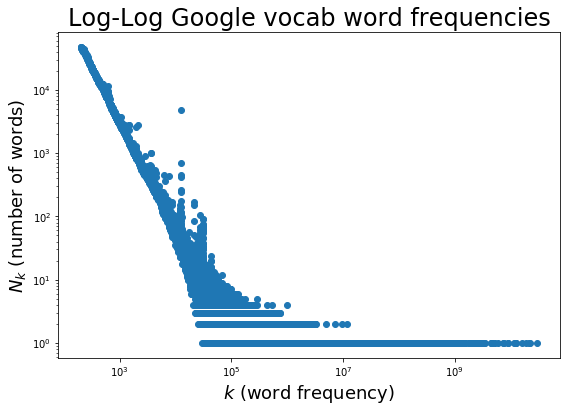

In [6]:
fig, ax = plt.subplots(1, figsize=(9,6))

ax.scatter(df["k"], df["n_k"], c="C0")
ax.set_xlabel(r"$k$ (word frequency)", fontsize=18)
ax.set_ylabel(r"$N_k$ (number of words)", fontsize=18)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("Log-Log Google vocab word frequencies", fontsize=24)
plt.savefig("part6_log.png", bbox_inches='tight', pad_inches=0)

plt.show()

Slope: -1.705278
Intercept: 8.563972
R: -0.963343 (R^2: 0.928030), P_val: 0.000000E+00


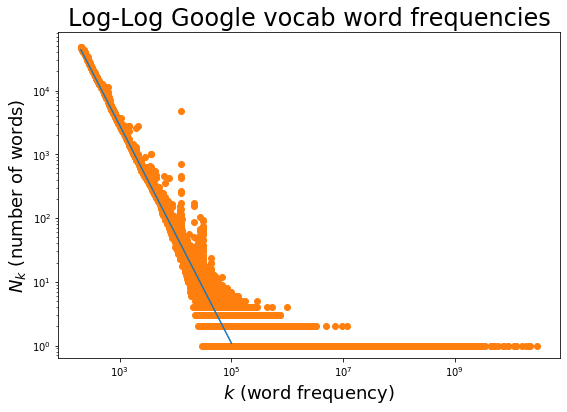

In [7]:
filtered_df = df[df["k"] <= 10**(5)]
slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_df["log10k"], filtered_df["log10n_k"])
predict_log = lambda n: intercept + slope * n

print("Slope: %.6f"%slope)
print("Intercept: %.6f"%intercept)
print("R: %.6f (R^2: %.6f), P_val: %.6E"%( r_value, r_value**2, p_value))

predictions = np.power(10, predict_log(filtered_df["log10k"]))
fig, ax = plt.subplots(1, figsize=(9,6))
ax.plot(filtered_df["k"], predictions, c="C0")
ax.scatter(df["k"], df["n_k"], c="C1")
ax.set_xlabel(r"$k$ (word frequency)", fontsize=18)
ax.set_ylabel(r"$N_k$ (number of words)", fontsize=18)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("Log-Log Google vocab word frequencies", fontsize=24)
plt.savefig("part7_regression_a.png", bbox_inches='tight', pad_inches=0)
plt.show()

Slope: -0.992188
Intercept: 5.383629
R: -0.869915 (R^2: 0.756752), P_val: 0.000000E+00


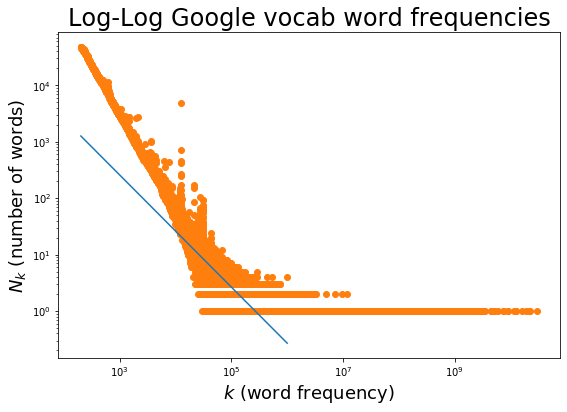

In [8]:
filtered_df = df[df["k"] <= 10**(6)]
slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_df["log10k"], filtered_df["log10n_k"])
predict_log = lambda n: intercept + slope * n

print("Slope: %.6f"%slope)
print("Intercept: %.6f"%intercept)
print("R: %.6f (R^2: %.6f), P_val: %.6E"%( r_value, r_value**2, p_value))

predictions = np.power(10, predict_log(filtered_df["log10k"]))
fig, ax = plt.subplots(1, figsize=(9,6))
ax.plot(filtered_df["k"], predictions, c="C0")
ax.scatter(df["k"], df["n_k"], c="C1")
ax.set_xlabel(r"$k$ (word frequency)", fontsize=18)
ax.set_ylabel(r"$N_k$ (number of words)", fontsize=18)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("Log-Log Google vocab word frequencies", fontsize=24)
plt.savefig("part7_regression_b.png", bbox_inches='tight', pad_inches=0)
plt.show()

In [9]:
df

,k,n_k,log10k,log10n_k
0,30578667846,1,10.485419,0.000000
1,22077031422,1,10.343941,0.000000
2,21594821357,1,10.334350,0.000000
3,19401194714,1,10.287828,0.000000
4,16337125274,1,10.213176,0.000000
...,...,...,...,...
238586,204,46023,2.309630,4.662975
238587,203,48262,2.307496,4.683605
238588,202,46787,2.305351,4.670125
238589,201,48179,2.303196,4.682858


In [10]:
df["k*n_k"] = df["k"]* df["n_k"]
df

,k,n_k,log10k,log10n_k,k*n_k
0,30578667846,1,10.485419,0.000000,30578667846
1,22077031422,1,10.343941,0.000000,22077031422
2,21594821357,1,10.334350,0.000000,21594821357
3,19401194714,1,10.287828,0.000000,19401194714
4,16337125274,1,10.213176,0.000000,16337125274
...,...,...,...,...,...
238586,204,46023,2.309630,4.662975,9388692
238587,203,48262,2.307496,4.683605,9797186
238588,202,46787,2.305351,4.670125,9450974
238589,201,48179,2.303196,4.682858,9683979


In [38]:
total_unique_words = df["n_k"].sum()

mean = (df["k"]*df["n_k"]).sum() / total_unique_words
moment_2 = ((df["k"]/ total_unique_words)*df["k"]*df["n_k"]).sum() # \sum k^2* N_k / \sum {n_k} = k^2 * p(k)
var = moment_2 - mean**2
std = np.sqrt(var)

print("Mean: %4E"%mean)
print("Variance: %4E\nStandard Deviation: %4E"%(var, std))



Mean: 6.165163E+04
Variance: 2.816980E+14
Standard Deviation: 1.678386E+07
